****PET-BREED-RECOGNITION****

Every notebook starts with these below  three lines:They ensured that any edit we make to the **libraries**,are **reloaded automatically** here.
Also,all **charts** will displayed here within the notebook.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all necessary packages.We are going to work with [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/),which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163).Fastai library provides many useful functions that enables us to quickly and easily build neural networks and train our models.

In [3]:
from fastai import *
from fastai.vision import *

When we use unusally small GPU,we may get an out of memory error when using notebook.At this point,we have to reduce batch size (bs).

In [4]:
bs = 64
#bs=16 #uncomment if out of memory error occured.

****Looking at the dataset****

Url of folder from where,we are going to import dataset folders. 

In [5]:
PETS = 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

We are going to use the **untar_data()** function to which we must pass a URL as an argument and which will download and extract the data.

In [6]:
path = untar_data(URLs.PETS);
path

PosixPath('/tmp/.fastai/data/oxford-iiit-pet')

Path of Folders or Files present in the Url.

In [7]:
path.ls()

[PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
path_anno = path/'annotations';
path_img = path/'images';

****fnames**** is an array,contain the path of images present in the folders.

In [9]:
fnames = get_image_files(path_img);
fnames[:7]

[PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/keeshond_26.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/Siamese_205.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/pomeranian_188.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/Sphynx_245.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/pomeranian_1.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/pug_13.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/beagle_99.jpg')]

we can use a **regular expression** by importing regular expression ‘re’ package in python, to do this.
Regular expressions are a way to search a string in text using pattern matching methods.

In [10]:
np.random.seed(42);
pat = r'/([^/]+)_\d+.jpg$'

**data** contain the whole data.

In [11]:
data = ImageDataBunch.from_name_re(path,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

In [12]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



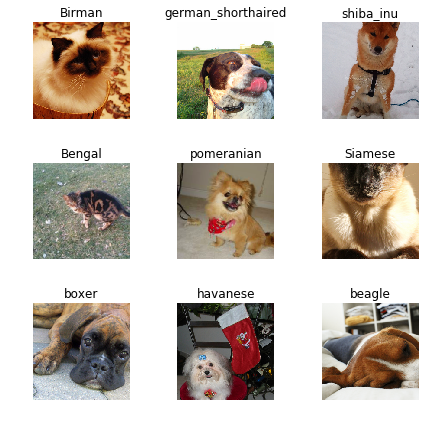

In [13]:
data.show_batch(rows=3,figsize=(6,6))

In [14]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

****Training: resnet34****

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier.For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [15]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 138MB/s]


In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.393124,0.353787,0.112991,01:24
1,0.595711,0.282467,0.094046,01:23
2,0.369355,0.237744,0.077808,01:22
3,0.271975,0.221201,0.074425,01:21


**Result**

Let's see what results we have got.

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly.

Furthermore, when we plot the **confusion matrix**, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()
len(data.valid_ds)==len(idxs)==len(losses)

True

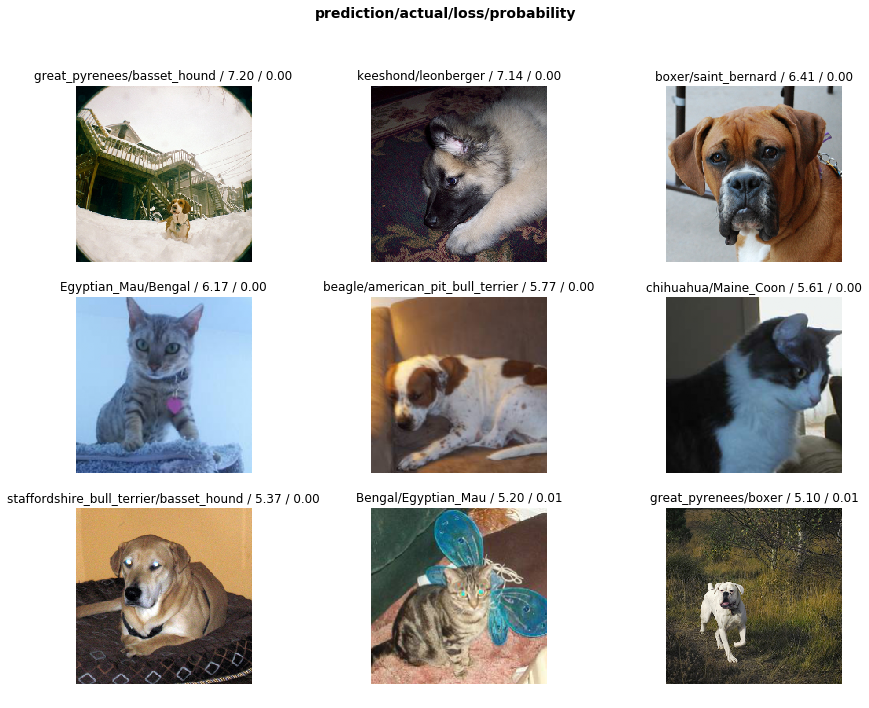

In [18]:
interp.plot_top_losses(9,figsize=(15,11))

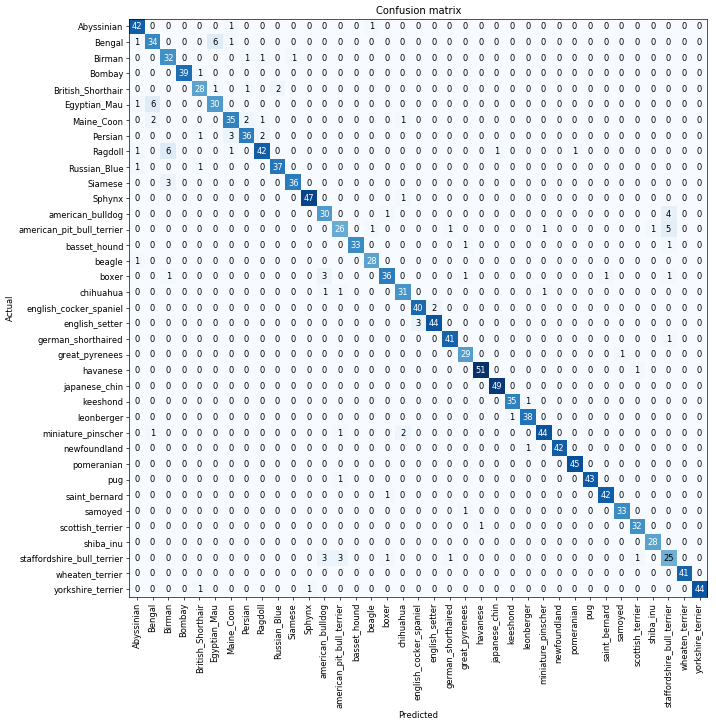

In [19]:
interp.plot_confusion_matrix(figsize=(15,12),dpi=60)

In [20]:
interp.most_confused(min_val=3)

[('Bengal', 'Egyptian_Mau', 6),
 ('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('Persian', 'Maine_Coon', 3),
 ('Siamese', 'Birman', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


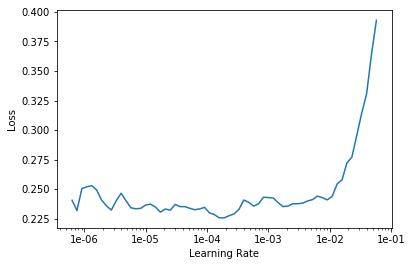

In [22]:
learn.recorder.plot()

In [23]:
learn.save('stage-1')

**Unfreezing , fine tunning and learning rates**

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.712662,0.420795,0.128552,01:22


In [26]:
learn.load('stage-1');

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


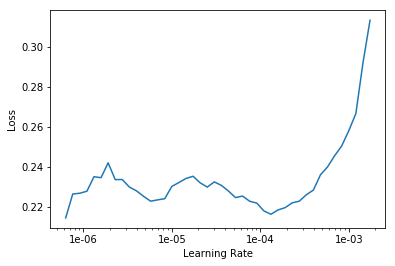

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.249059,0.215377,0.074425,01:22
1,0.213727,0.210152,0.072395,01:22


****Training : resnet50****

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers.

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.


In [30]:
data = ImageDataBunch.from_name_re(path,fnames,pat,ds_tfms=get_transforms(),size=299,bs= bs//2).normalize(imagenet_stats)

In [31]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 73.8MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


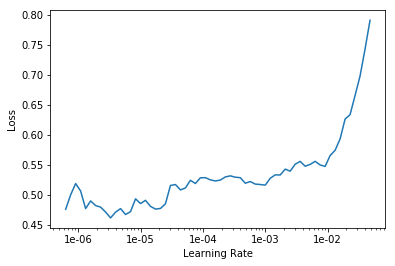

In [34]:
learn.lr_find();
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.532822,0.315963,0.098106,01:58
1,0.515301,0.293090,0.090663,01:58
2,0.376406,0.248093,0.075778,01:56
3,0.352422,0.255053,0.073748,01:57
4,0.254437,0.203807,0.069012,01:57
5,0.185304,0.158501,0.050068,01:57
6,0.115808,0.150632,0.050068,01:56
7,0.121808,0.143845,0.046685,01:57


In [36]:
learn.save('stage-1-50')

In [44]:
learn.unfreeze()

In [45]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.101541,0.143022,0.050068,02:01
1,0.087519,0.136631,0.050744,02:00
2,0.069543,0.137580,0.049391,02:00


In [46]:
learn.load('stage-1-50');

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

In [48]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Siamese', 'Birman', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2)]